In [1]:
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
import string
import seaborn as sns
import nltk

from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')
 









In [14]:
data = pd.read_csv(r'E:\Project\Project Major\Twitter Sentiment Analysis\Russia-Ukraine War Dataset\Russia_invade.csv')
data

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,snscrape.modules.twitter.Tweet,https://twitter.com/pat_ianni/status/150025982...,2022-03-05 23:59:50+00:00,JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE ...,JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE ...,1500259827154505728,"{'_type': 'snscrape.modules.twitter.User', 'us...",14,26,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russia invade
1,snscrape.modules.twitter.Tweet,https://twitter.com/luxeprogressive/status/150...,2022-03-05 23:59:05+00:00,@ProfPaulPoast He doesn’t have to like it but ...,@ProfPaulPoast He doesn’t have to like it but ...,1500259636863246336,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,NaN,NaN,1.500259e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade
2,snscrape.modules.twitter.Tweet,https://twitter.com/spielblog/status/150025947...,2022-03-05 23:58:26+00:00,@SemproniusT @RichardHanania And if NATO is th...,@SemproniusT @RichardHanania And if NATO is th...,1500259474040180738,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,1.500259e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade
3,snscrape.modules.twitter.Tweet,https://twitter.com/JumboSlunce/status/1500259...,2022-03-05 23:58:20+00:00,@jakehase @Groutandgo @MysticAura_ @SkylarJord...,@jakehase @Groutandgo @MysticAura_ @SkylarJord...,1500259447742115841,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,1.500248e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade
4,snscrape.modules.twitter.Tweet,https://twitter.com/ronanmcmanus/status/150025...,2022-03-05 23:58:17+00:00,@2_4_5T_2_4_D @carolecadwalla @estellecostanza...,@2_4_5T_2_4_D @carolecadwalla @estellecostanza...,1500259435142340608,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,1.500258e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170830,snscrape.modules.twitter.Tweet,https://twitter.com/Hansthewise/status/1476708...,2021-12-31 00:15:17+00:00,"AS WE APPROACH 2022, PUTIN IS UNDER DOMESTIC P...","AS WE APPROACH 2022, PUTIN IS UNDER DOMESTIC P...",1476708501535690759,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",NaN,NaN,Russia invade
170831,snscrape.modules.twitter.Tweet,https://twitter.com/CollinHenriksen/status/147...,2021-12-31 00:08:30+00:00,Prediction for this year Russia will invade Uk...,Prediction for this year Russia will invade Uk...,1476706796253425664,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russia invade
170832,snscrape.modules.twitter.Tweet,https://twitter.com/DanaAnn0520/status/1476706...,2021-12-31 00:05:51+00:00,Yes! For sure. Standing up for America. He wou...,Yes! For sure. Standing up for America. He wou...,1476706129036165121,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russia invade
170833,snscrape.modules.twitter.Tweet,https://twitter.com/conchi_gonzalez/status/147...,2021-12-31 00:05:33+00:00,#Russia owns #Cuba and #Venezuela. #Putin want...,#Russia owns #Cuba and #Venezuela. #Putin want...,1476706054759190530,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,NaN,NaN,"['Russia', 'Cuba', 'Venezu

In [15]:
data.dtypes

_type                object
url                  object
date                 object
content              object
renderedContent      object
id                    int64
user                 object
replyCount            int64
retweetCount          int64
likeCount             int64
quoteCount            int64
conversationId        int64
lang                 object
source               object
sourceUrl            object
sourceLabel          object
outlinks             object
tcooutlinks          object
media                object
retweetedTweet      float64
quotedTweet          object
inReplyToTweetId    float64
inReplyToUser        object
mentionedUsers       object
coordinates          object
place                object
hashtags             object
cashtags             object
Searh                object
dtype: object

# Data Preprocessing

In [16]:
data.drop(data.columns[[0,1,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]], axis=1, inplace=True)
data

,date,content,lang
0,2022-03-05 23:59:50+00:00,JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE ...,en
1,2022-03-05 23:59:05+00:00,@ProfPaulPoast He doesn’t have to like it but ...,en
2,2022-03-05 23:58:26+00:00,@SemproniusT @RichardHanania And if NATO is th...,en
3,2022-03-05 23:58:20+00:00,@jakehase @Groutandgo @MysticAura_ @SkylarJord...,en
4,2022-03-05 23:58:17+00:00,@2_4_5T_2_4_D @carolecadwalla @estellecostanza...,en
...,...,...,...
170830,2021-12-31 00:15:17+00:00,"AS WE APPROACH 2022, PUTIN IS UNDER DOMESTIC P...",en
170831,2021-12-31 00:08:30+00:00,Prediction for this year Russia will invade Uk...,en
170832,2021-12-31 00:05:51+00:00,Yes! For sure. Standing up for America. He wou...,en
170833,2021-12-31 00:05:33+00:00,#Russia owns #Cuba and #Venezuela. #Putin want...,en


In [17]:

#data.drop(data.index[1001:170834], inplace=True)
data

,date,content,lang
0,2022-03-05 23:59:50+00:00,JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE ...,en
1,2022-03-05 23:59:05+00:00,@ProfPaulPoast He doesn’t have to like it but ...,en
2,2022-03-05 23:58:26+00:00,@SemproniusT @RichardHanania And if NATO is th...,en
3,2022-03-05 23:58:20+00:00,@jakehase @Groutandgo @MysticAura_ @SkylarJord...,en
4,2022-03-05 23:58:17+00:00,@2_4_5T_2_4_D @carolecadwalla @estellecostanza...,en
...,...,...,...
170830,2021-12-31 00:15:17+00:00,"AS WE APPROACH 2022, PUTIN IS UNDER DOMESTIC P...",en
170831,2021-12-31 00:08:30+00:00,Prediction for this year Russia will invade Uk...,en
170832,2021-12-31 00:05:51+00:00,Yes! For sure. Standing up for America. He wou...,en
170833,2021-12-31 00:05:33+00:00,#Russia owns #Cuba and #Venezuela. #Putin want...,en


# Dropping rows that contain null data in that column

In [18]:

data.dropna(subset = ['content'], axis = 0, inplace = True)
data.reset_index(inplace = True, drop = True)
data.shape


(170835, 3)

# Slicing the date , and removing the time portion

In [19]:
# slicing the date , and removing the time portion
data['date'] = data.date.str.slice(0, 10)
data

,date,content,lang
0,2022-03-05,JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE ...,en
1,2022-03-05,@ProfPaulPoast He doesn’t have to like it but ...,en
2,2022-03-05,@SemproniusT @RichardHanania And if NATO is th...,en
3,2022-03-05,@jakehase @Groutandgo @MysticAura_ @SkylarJord...,en
4,2022-03-05,@2_4_5T_2_4_D @carolecadwalla @estellecostanza...,en
...,...,...,...
170830,2021-12-31,"AS WE APPROACH 2022, PUTIN IS UNDER DOMESTIC P...",en
170831,2021-12-31,Prediction for this year Russia will invade Uk...,en
170832,2021-12-31,Yes! For sure. Standing up for America. He wou...,en
170833,2021-12-31,#Russia owns #Cuba and #Venezuela. #Putin want...,en


In [20]:
# Removing duplicate tweets

data.drop_duplicates(inplace=True) 
data.shape

(170426, 3)

In [22]:
#lower casing the data

data["content"] = data.content.str.lower()
data

,date,content,lang
0,2022-03-05,joe biden says how do we get to a place where ...,en
1,2022-03-05,@profpaulpoast he doesn’t have to like it but ...,en
2,2022-03-05,@semproniust @richardhanania and if nato is th...,en
3,2022-03-05,@jakehase @groutandgo @mysticaura_ @skylarjord...,en
4,2022-03-05,@2_4_5t_2_4_d @carolecadwalla @estellecostanza...,en
...,...,...,...
170830,2021-12-31,"as we approach 2022, putin is under domestic p...",en
170831,2021-12-31,prediction for this year russia will invade uk...,en
170832,2021-12-31,yes! for sure. standing up for america. he wou...,en
170833,2021-12-31,#russia owns #cuba and #venezuela. #putin want...,en


In [23]:
# checking all the unique dates in the dataset
print(data['date'].unique()) 

['2022-03-05' '2022-03-04' '2022-03-03' '2022-03-02' '2022-03-01'
 '2022-02-28' '2022-02-27' '2022-02-26' '2022-02-25' '2022-02-24'
 '2022-02-23' '2022-02-22' '2022-02-21' '2022-02-20' '2022-02-19'
 '2022-02-18' '2022-02-17' '2022-02-16' '2022-02-15' '2022-02-14'
 '2022-02-13' '2022-02-12' '2022-02-11' '2022-02-10' '2022-02-09'
 '2022-02-08' '2022-02-07' '2022-02-06' '2022-02-05' '2022-02-04'
 '2022-02-03' '2022-02-02' '2022-02-01' '2022-01-31' '2022-01-30'
 '2022-01-29' '2022-01-28' '2022-01-27' '2022-01-26' '2022-01-25'
 '2022-01-24' '2022-01-23' '2022-01-22' '2022-01-21' '2022-01-20'
 '2022-01-19' '2022-01-18' '2022-01-17' '2022-01-16' '2022-01-15'
 '2022-01-14' '2022-01-13' '2022-01-12' '2022-01-11' '2022-01-10'
 '2022-01-09' '2022-01-08' '2022-01-07' '2022-01-06' '2022-01-05'
 '2022-01-04' '2022-01-03' '2022-01-02' '2022-01-01' '2021-12-31']


In [24]:
# checking how many unique language are present in the tweets
print(data["lang"].unique())

['en' 'pt' 'zh' 'nl' 'it' 'es' 'de' 'ca' 'cy' 'fr' 'tr' 'ro' 'pl' 'cs'
 'ja' 'in' 'hi' 'und' 'sv' 'tl' 'et' 'fi' 'da' 'no' 'el' 'ht' 'ru' 'ar'
 'ko' 'fa' 'sl' 'iw' 'dv' 'ta' 'lv']


In [25]:
# before removing the non-english tweets
print(data.shape)
 
# removing all the tweets except the eng tweets

data = data[data['lang'] == 'en']

print("After removing non-english Tweets")
 
# after removing non-english tweets
print(data.shape) 

(170426, 3)
After removing non-english Tweets
(165247, 3)


In [5]:


# Removing RT
def remove_rt(x): return re.sub('RT @\w+: ', " ", x)

#Removing @, username, urls, punctuations
def rt(x): return re.sub(
    "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", x)

data["content"] = data.content.map(remove_rt).map(rt)



data[{'content'}]


NameError: name 'data' is not defined

In [16]:
data.dtypes


date               object
content            object
lang               object
numbers_removed    object
punct              object
tokenized          object
nonstop            object
stemmed            object
dtype: object

In [17]:
# Joining data for model application
for i in data.index:
    data.stemmed[i] = ' '.join(data.stemmed[i])
    
data['content']= data['stemmed']   

# Sentiment Analysis

In [18]:
data[['polarity', 'subjectivity']] = data['content'].apply(
    lambda Text: pd.Series(TextBlob(Text).sentiment))
 
for index, row in data['content'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
     
    if neg > pos:
        data.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        data.loc[index, 'sentiment'] = "positive"
    else:
        data.loc[index, 'sentiment'] = "neutral"
         
    data.loc[index, 'neg'] = neg
    data.loc[index, 'neu'] = neu
    data.loc[index, 'pos'] = pos
    data.loc[index, 'compound'] = comp

In [19]:
data[["content", "sentiment", "polarity"
        , "neg", "pos"]].head()

,content,sentiment,polarity,neg,pos
0,joe biden say get place putin decid invad russ...,neutral,0.000000,0.000,0.000
1,like countri sovereign proven valid concern w...,positive,0.000000,0.000,0.122
2,nato aggressor mayb russia declar war nato wo...,negative,0.300000,0.320,0.123
3,zelenski put power coup ukrain want russia uk...,negative,0.000000,0.084,0.078
4,point ukrain ask nato eu help russia would ha...,positive,-0.013393,0.000,0.257


In [20]:
#To show the percentage of neg, neu and pos data
total_pos = len(data.loc[data['sentiment'] == "positive"])
total_neg = len(data.loc[data['sentiment'] == "negative"])
total_neu = len(data.loc[data['sentiment'] == "neutral"])
total_tweets = len(data)
print("Total Positive Tweets % : {:.2f}"
      .format((total_pos/total_tweets)*100))
print("Total Negative Tweets % : {:.2f}"
      .format((total_neg/total_tweets)*100))
print("Total Neutral Tweets % : {:.2f}"
      .format((total_neu/total_tweets)*100))

Total Positive Tweets % : 33.06
Total Negative Tweets % : 42.20
Total Neutral Tweets % : 24.74


# Pie Chart

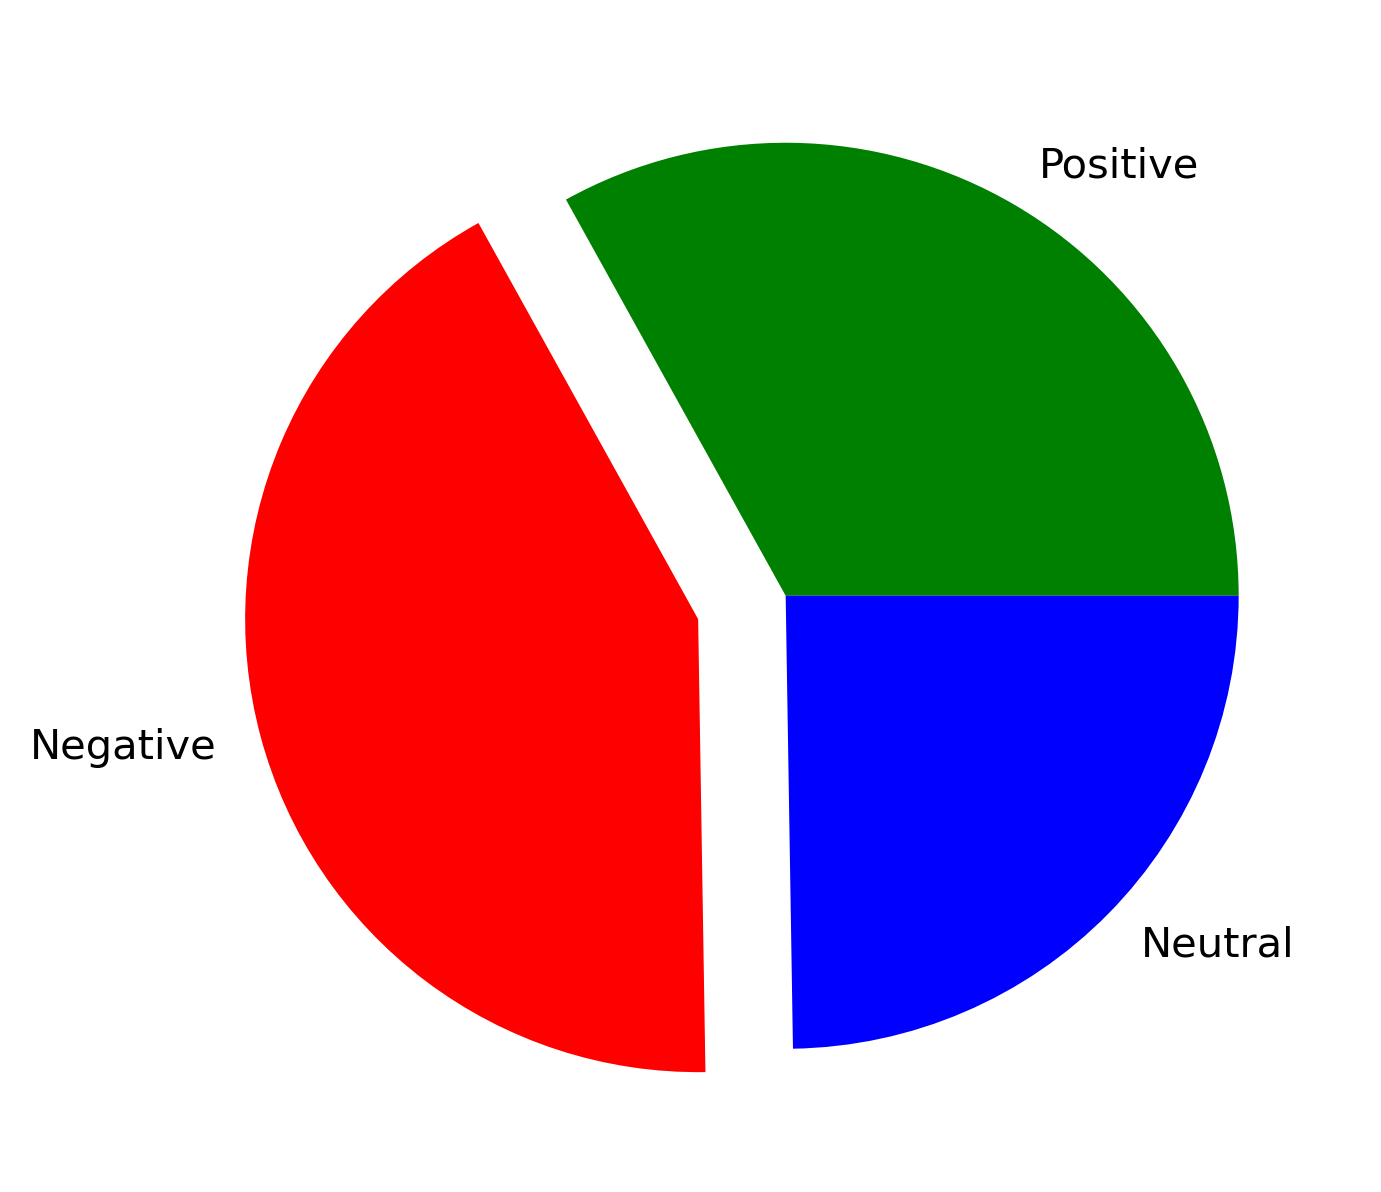

In [21]:
mylabels = ["Positive", "Negative", "Neutral"]
mycolors = ["Green", "Red", "Blue"]
 
plt.figure(figsize=(8, 5),
           dpi=300)  
myexplode = [0, 0.2, 0]
plt.pie([total_pos, total_neg, total_neu], colors=mycolors,
        labels=mylabels, explode=myexplode)
plt.show()

# Time frame graph

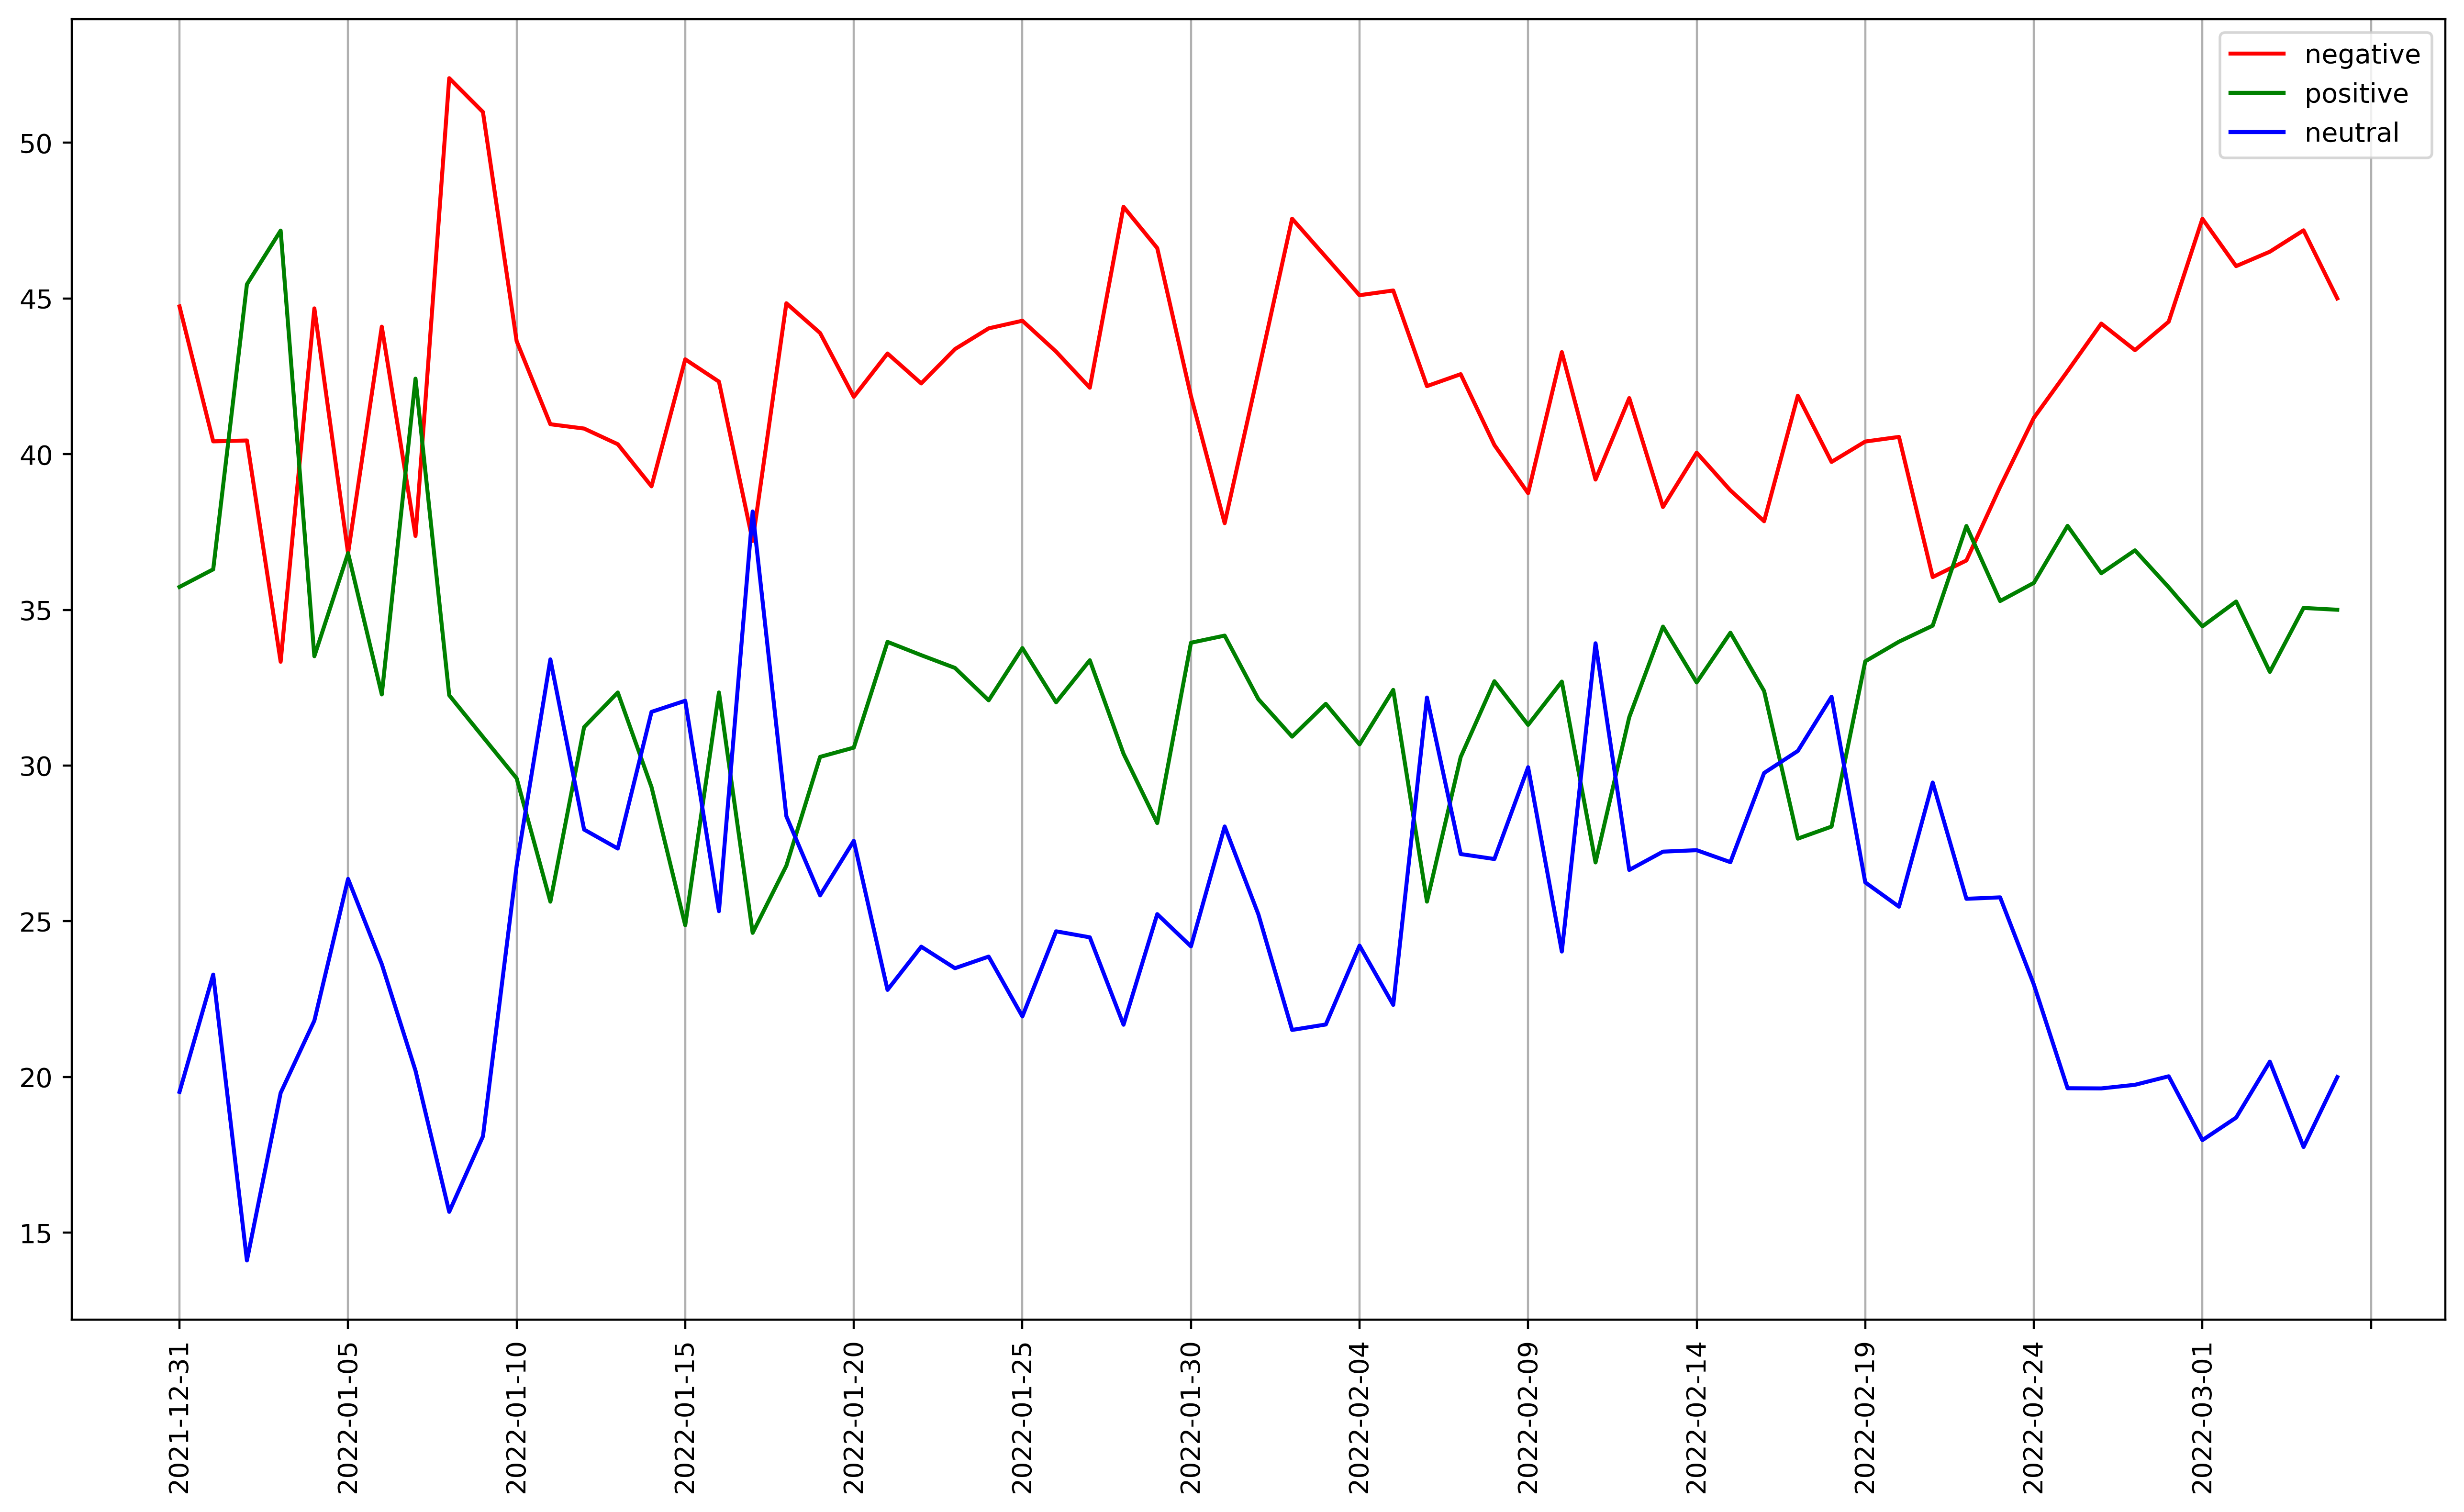

In [22]:
#Visualizing data according to time frame
pos_list = []
neg_list = []
neu_list = []
for i in data["date"].unique():
    temp = data[data["date"] == i]
    positive_temp = temp[temp["sentiment"] == "positive"]
    negative_temp = temp[temp["sentiment"] == "negative"]
    neutral_temp = temp[temp["sentiment"] == "neutral"]
    pos_list.append(((positive_temp.shape[0]/temp.shape[0])*100, i))
    neg_list.append(((negative_temp.shape[0]/temp.shape[0])*100, i))
    neu_list.append(((neutral_temp.shape[0]/temp.shape[0])*100, i))
 
    neu_list = sorted(neu_list, key=lambda x: x[1])
    pos_list = sorted(pos_list, key=lambda x: x[1])
    neg_list = sorted(neg_list, key=lambda x: x[1])
 
    x_cord_neg = []
    y_cord_neg = []
 
    x_cord_pos = []
    y_cord_pos = []
 
    x_cord_neu = []
    y_cord_neu = []
 
    for i in neg_list:
        x_cord_neg.append(i[0])
        y_cord_neg.append(i[1])
 
 
    for i in pos_list:
        x_cord_pos.append(i[0])
        y_cord_pos.append(i[1])
 
    for i in neu_list:
        x_cord_neu.append(i[0])
        y_cord_neu.append(i[1])
 
 
plt.figure(figsize=(16, 9),
           dpi=400)  # Push new figure on stack
plt.plot(y_cord_neg, x_cord_neg, label="negative",
         color="red")
plt.plot(y_cord_pos, x_cord_pos, label="positive",
         color="green")
plt.plot(y_cord_neu, x_cord_neu, label="neutral",
         color="blue")
plt.xticks(np.arange(0, len(data["date"].unique()) + 1, 5))
plt.xticks(rotation=90)
plt.grid(axis='x')
 
plt.legend()

In [23]:

A_data = data[["content","polarity","sentiment"]]
A_data


,content,polarity,sentiment
0,joe biden say get place putin decid invad russ...,0.000000,neutral
1,like countri sovereign proven valid concern w...,0.000000,positive
2,nato aggressor mayb russia declar war nato wo...,0.300000,negative
3,zelenski put power coup ukrain want russia uk...,0.000000,negative
4,point ukrain ask nato eu help russia would ha...,-0.013393,positive
...,...,...,...
170830,approach putin domest pressur think invad ukra...,0.136364,negative
170831,predict year russia invad ukrain januari china...,-0.150000,neutral
170832,ye sure stand america would never left anyon a...,-0.068750,positive
170833,russia own cuba venezuela putin want ukrain k...,0.600000,positive


In [24]:
A_data.to_csv('labeled.csv', index = False)

,content,polarity,sentiment
0,joe biden say get place putin decid invad russ...,0.000000,neutral
1,like countri sovereign proven valid concern w...,0.000000,positive
2,nato aggressor mayb russia declar war nato wo...,0.300000,negative
3,zelenski put power coup ukrain want russia uk...,0.000000,negative
4,point ukrain ask nato eu help russia would ha...,-0.013393,positive
...,...,...,...
170830,approach putin domest pressur think invad ukra...,0.136364,negative
170831,predict year russia invad ukrain januari china...,-0.150000,neutral
170832,ye sure stand america would never left anyon a...,-0.068750,positive
170833,russia own cuba venezuela putin want ukrain k...,0.600000,positive


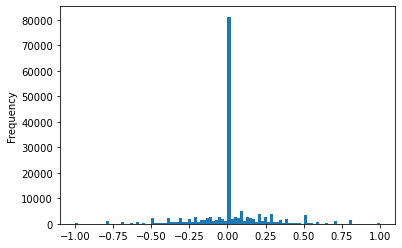

In [25]:

A_data['polarity'].plot(kind='hist', bins=100)
A_data


# Word Cloud

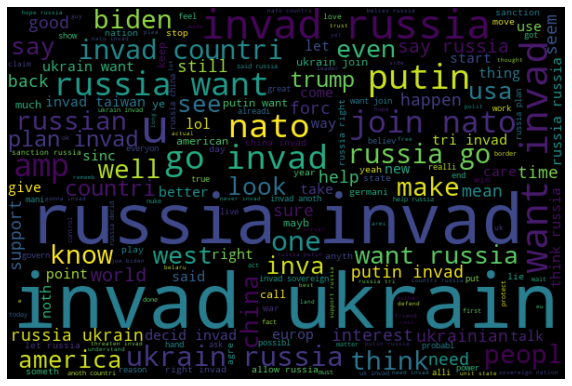

In [26]:
# World Cloud for positive words

from wordcloud import WordCloud
positive_words = ' '.join([text for text in A_data[A_data.sentiment == 'positive']['content']])
wordcloud = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 100).generate(positive_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

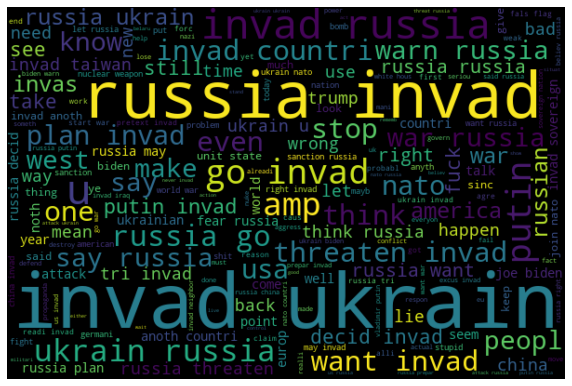

In [27]:
# World Cloud for negative words

from wordcloud import WordCloud
negative_words = ' '.join([text for text in A_data[A_data.sentiment == 'negative']['content']])
wordcloud = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 100).generate(negative_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

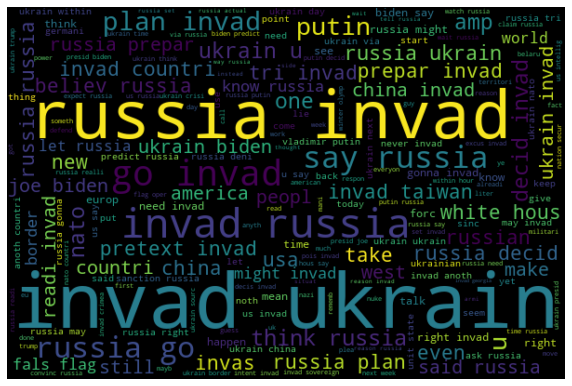

In [28]:
# World Cloud for neutral words

from wordcloud import WordCloud
neutral_words = ' '.join([text for text in A_data[A_data.sentiment == 'neutral']['content']])
wordcloud = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 100).generate(neutral_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [29]:
# Removing polarity data and writing to a csv file

A_data.drop(["polarity"], axis = 1, inplace = True)

A_data.to_csv('labeled.csv', index = False)